In [1]:
import matplotlib.pyplot as plt
import numpy as np
import SSLimPy.interface.sslimpy as sslimpy

import astropy.units as u

In [2]:
cosmodict={"h":0.67,"Omegam":0.32,"Omegab":0.04,"As":2.1e-9, "mnu":0.06}
settings = {"code":"class"}

Asslimpy = sslimpy.sslimpy(settings_dict=settings,
                           cosmopars=cosmodict)

#--------------------------------------------------#

  SSSSS   SSSSS  L       i            PPPP   y    y 
 S     S S     S L            m   m   P    P y   y  
 S       S       L     iii   m m m m  P    P  y y   
  SSSSS   SSSSS  L       i   m  m  m  PPPP     y    
       S       S L       i   m     m  P        y    
 S     S S     S L       i   m     m  P       y     
  SSSSS   SSSSS  LLLLL iiiii m     m  P      y      

#--------------------------------------------------#
(400,)
(1, 1, 1)
(400, 500, 1)
(1, 1, 400)
(400,)
(1, 1, 1)
(400, 500, 1)
(1, 1, 400)
(400,)
(1, 1, 1)
(400, 500, 1)
(1, 1, 400)


In [3]:
from SSLimPy.LIMsurvey import PowerSpectra
pobs = PowerSpectra.PowerSpectra(Asslimpy.fiducialcosmo,Asslimpy.fiducialastro)

In [4]:
pobs.prepare_c_NFW()

(400,)
(1, 1, 22)
(400, 500, 1)
(400, 1, 22)
(400,)
(1, 1, 22)
(400, 500, 1)
(400, 1, 22)
(400,)
(1, 1, 22)
(400, 500, 1)
(400, 1, 22)


ValueError: operands could not be broadcast together with shapes (500,) (500,22) 

In [ ]:
Asslimpy.fiducialcosmo.sigma8_of_z(0)

array(0.86094005)

In [ ]:
Asslimpy.fiducialcosmo.sigmaR_of_z(0,(8/0.67)*u.Mpc)

<Quantity 0.86101513>

In [ ]:
k= np.geomspace(1e-3,1,200)
z= np.array(range(4))
M = np.geomspace(1e7*u.Msun,1e11*u.Msun)
sigma_m_z = Asslimpy.fiducialastro.sigmaM_of_z(M,z)


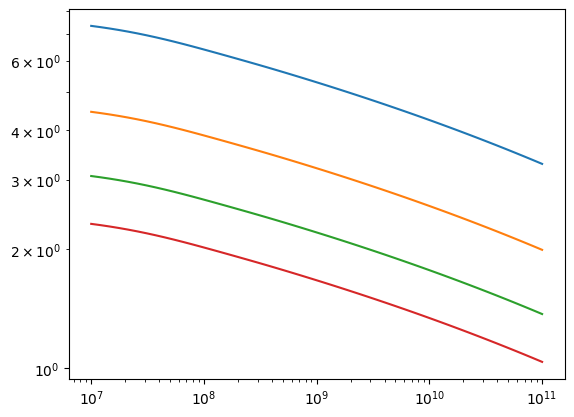

In [ ]:
plt.loglog(M,sigma_m_z)

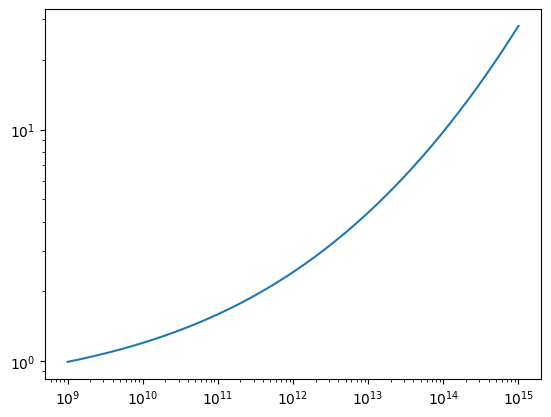

In [ ]:
plt.loglog(Asslimpy.fiducialastro.M,Asslimpy.fiducialastro.b_of_M)


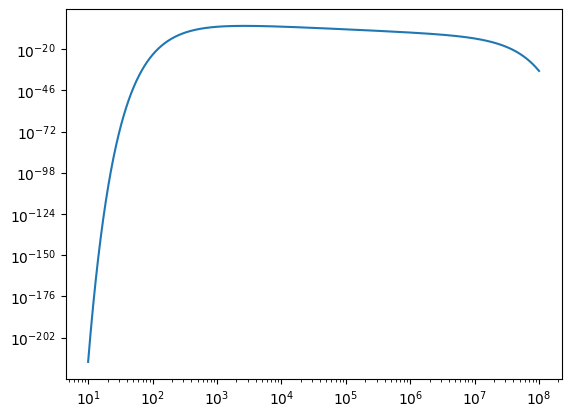

In [ ]:
plt.loglog(Asslimpy.fiducialastro.L,Asslimpy.fiducialastro.dn_dL_of_L)

Text(0, 0.5, '$P_{cb}/P_{mm}$')

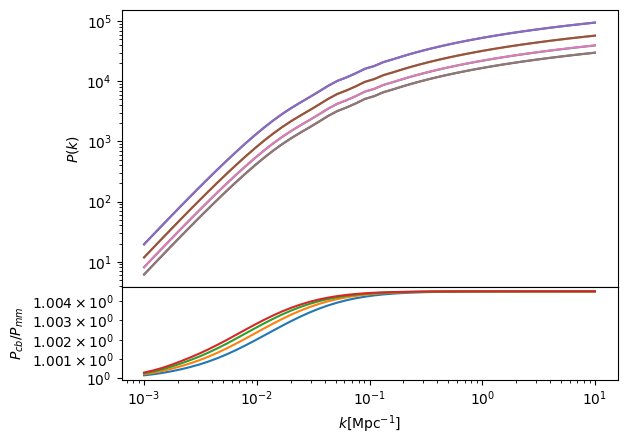

In [ ]:
k= np.geomspace(1e-3,10)
fig, axs = plt.subplots(2,1,height_ratios=[3,1],sharex=True)
axs[0].loglog(k, Asslimpy.fiducialcosmo.Transfer(z,k).T)
axs[0].loglog(k, Asslimpy.fiducialcosmo.Transfer(z,k,tracer="clustering").T)
axs[1].loglog(k, Asslimpy.fiducialcosmo.Transfer(z,k,tracer="clustering").T/Asslimpy.fiducialcosmo.Transfer(z,k,tracer="matter").T)
fig.subplots_adjust(hspace=0)
axs[1].set_xlabel("$k [\mathrm{Mpc}^{-1}]$")
axs[0].set_ylabel("$P(k)$")
axs[1].set_ylabel("$P_{cb}/P_{mm}$")

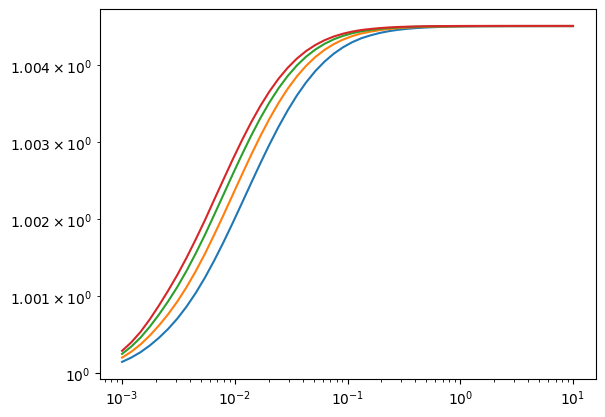

In [ ]:
plt.plot(k, Asslimpy.fiducialcosmo.Transfer(z,k,tracer="clustering").T/Asslimpy.fiducialcosmo.Transfer(z,k).T)
plt.xscale("log")
plt.yscale("log")